<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/classifcaion_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classifcaion -> binary classificaion , multiclass classficaion

* architecture

* inputs shapes and output shape

* steps in modeling

* defferent classificaion evaluation model

* saving and loading models


In [1]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000
# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [2]:
# make a dataframe
import pandas as pd
circles = pd.DataFrame({'X0':X_train[:,0], 'X1':X_train[:,1], 'label':y_train})
circles.head()

,X0,X1,label
0,0.339489,-0.736725,1
1,-0.314000,0.942543,0
2,-0.506802,-0.643682,1
3,-0.876364,0.484181,0
4,0.745142,-0.715244,0


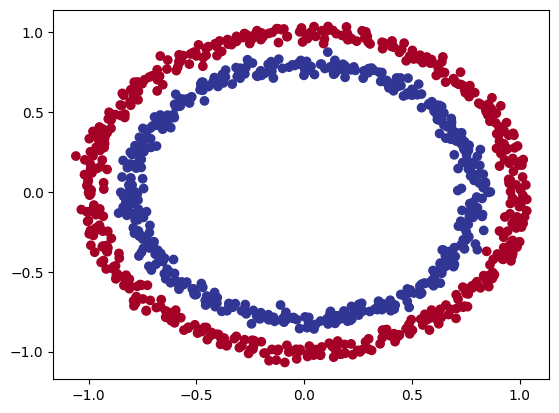

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [4]:
# check the shapes of our feature and labels
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# view teh first examle of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## stes in modelling
teh stpes in modelling with tensorflow are typically .
1. create or import a model
2. compile a model
3. fit the model
4. evaluate the mode
5. tweak
6. evaluate...

In [6]:
from os import access
# set the random seed
import tensorflow as tf
tf.random.set_seed(42)
# createa the model using sequentail API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,verbose=0)# i like to set verbose to 0 so as to reduce the output
model.evaluate(X_test,y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.6931  


[0.6933397650718689, 0.47200000286102295]

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

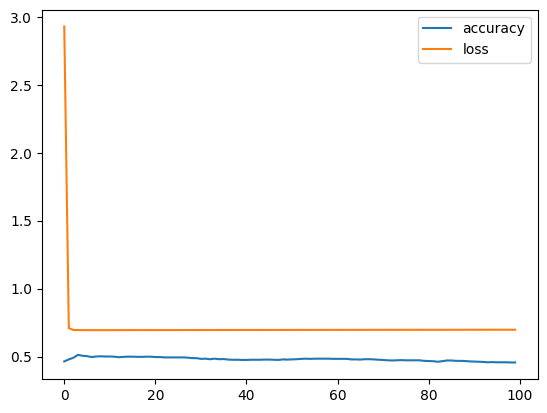

In [8]:
# draw the history of the loss
pd.DataFrame(history.history).plot()
plt.show()

In [9]:
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.49465814],
       [0.4943018 ],
       [0.49789602],
       [0.49825713],
       [0.49532953]], dtype=float32)

To visualize our model  predictions lest create a function



In [10]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the dicision boundary created by a model predicting on X
  """
  # define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1
  # Changed np.linespace to np.linspace
  XX,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))
  # create  X values ( were going to make prediction on these)
  X_in = np.c_[XX.ravel(),yy.ravel()]
  # make predictions
  y_pred = model.predict(X_in)
  # check for mulit-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classificaion")
    y_pred = np.argmax(y_pred,axis=1).reshape(XX.shape)
  else:
    print("doing binary classificaion")
    y_pred = np.round(y_pred).reshape(XX.shape)
  # plot the decision boundary
  plt.contourf(XX,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdBu)
  plt.xlim(XX.min(),XX.max())
  plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion


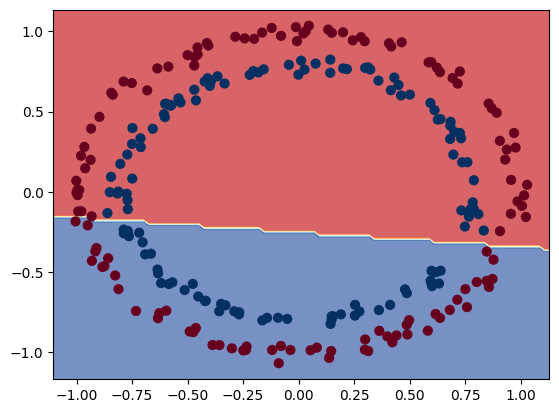

In [11]:
# checkout the prediction our model is making
plot_decision_boundary(model=model,X=X_test,y=y_test)

In [12]:
# let change the model so that it can use non linear using relu and also reduce overfitting
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2,verbose=0)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.1257 
Test Loss: 0.12512637674808502, Test Accuracy: 0.9959999918937683


<Axes: >

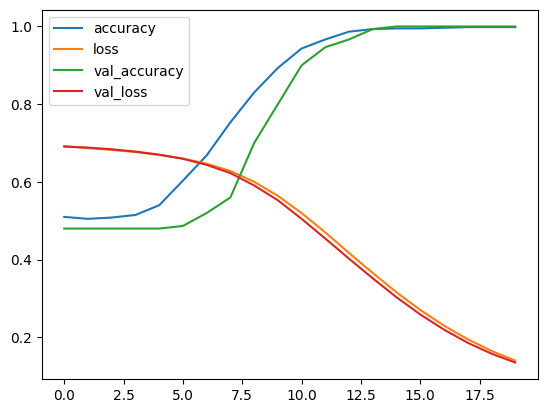

In [13]:
# visualize the loss history
pd.DataFrame(history.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classificaion


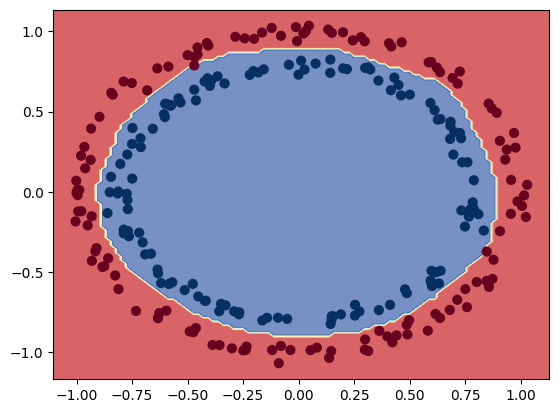

In [14]:
plot_decision_boundary(model=model,X=X_test,y=y_test)

## finsinf the best learnign rate
to find the ideal learning rate were going to use the following steps:
* a learning rate **callback** -> you can think of a callback as an extra functionality while the training is taking place
* another model( we could use the same one as above ,but were practicing building model here)
* a modified loss curves plot

In [15]:
#set random seed
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# create a leanring rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2,verbose=0,callbacks=[lr_scheduler])

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.6076 
Test Loss: 0.6139134764671326, Test Accuracy: 0.6359999775886536


<Axes: >

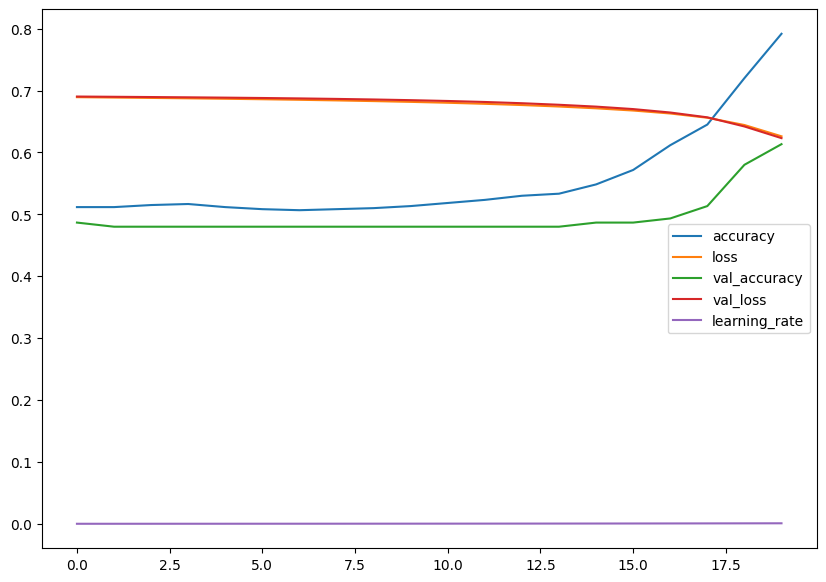

In [16]:
# checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7))

In [17]:
model.evaluate(X_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.6076 


[0.6139134764671326, 0.6359999775886536]

## more classificaion evaluation methods

we can use evaluatation methods and matrix you should be knwoing:
* accuracy
* predicsion
* recall
* f1-score
* confusion matrix
* classifcaion report( from scikit-learn)
you can look the documentatioin and be more familiear with thme

In [19]:
# check the accuracy of our model
loss , accuracy = model.evaluate(X_test,y_test)
print(f"Model loss on the test set is : {loss}")
print(f"model accuray on the test set : { accuracy }")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6641 - loss: 0.6076  
Model loss on the test set is : 0.6139134764671326
model accuray on the test set : 0.6359999775886536


how about a confisuion matrix?

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


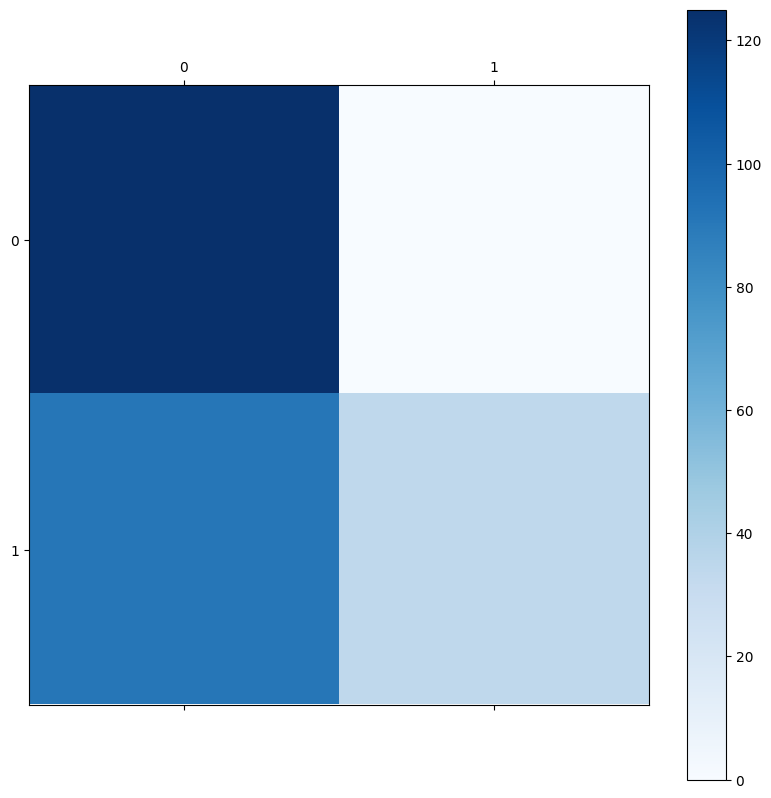

In [40]:
# lets create a confision matrix
from sklearn.metrics import confusion_matrix# importing the confusion matrix
# make predictions
y_pred = model.predict(X_test)
# lets convert the prediction arrays inot labels other than predicion probability
y_pred_label = tf.round(y_pred)
y_pred_label
# now lets create a confusion matrix

# Removed the print() from this line to assign the confusion matrix to cm
cm = confusion_matrix(y_test,tf.squeeze(tf.round(y_pred)))# now this is perfect make sure the predicted shape is the same as the real shape i had a problem about it
# lets pretify our confusion matrix -> this will be so cool
import itertools
figsize = (10,10)
# create the confusin matrix
# Removed the print() from this line as well, cm already holds the confusion matrix
# cm = print(confusion_matrix(y_test,tf.squeeze(tf.round(y_pred)))) # Corrected line
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
# create a figure
n_classes = cm.shape[0]
fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
# create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


##mutlicalss classificaion

we are going to use fashio_mnist dataset for multiclass classification

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# data has been already be sorted into trainang and test set for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
# show the first trainging example
print(f"training sample : \n{train_data[0]}\n")
print(f"traingin label: \n{train_labels[0]}\n")

training sample : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [43]:
train_data.shape

(60000, 28, 28)

In [44]:
test_data.shape

(10000, 28, 28)

In [45]:
train_labels.shape

(60000,)

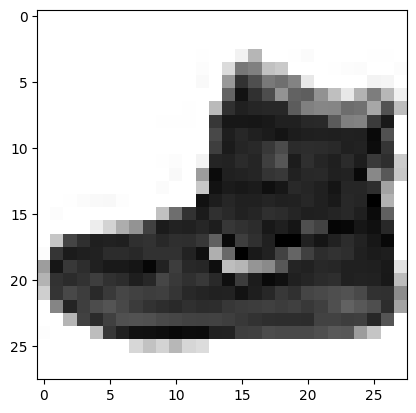

In [46]:
# plot a single shamle
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap=plt.cm.binary)
plt.show()

In [48]:
# check sample label
train_labels[0]# not what i expected for sure , there must be a way


9

In [49]:
# create a small list so we can index onto our trainign labels sothey re human-readble
classe_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


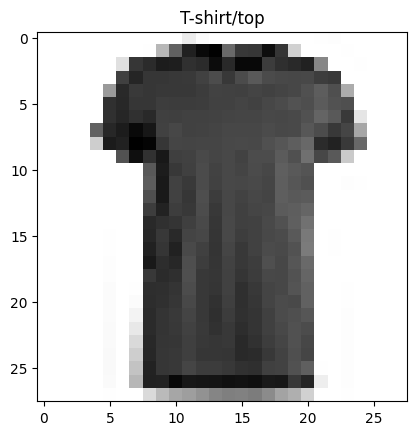

In [50]:
# plot an example image and its label
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(classe_names[train_labels[17]])
plt.show()

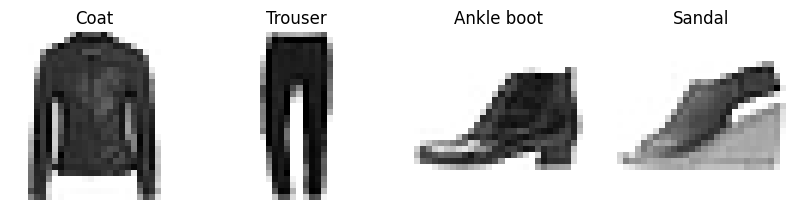

In [59]:
# plot multiple random images of fashio MNist
import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax = plt.subplot(1,4,i+1)
  rand_index = random.randint(0,len(train_data))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(classe_names[train_labels[rand_index]])
  plt.axis("off")